## Gran Turismo 7 car list
- Made by Noppakrit Phurisuriyaroj 6341109426
- data source : https://www.kaggle.com/datasets/prasertk/gran-turismo-7-car-list


---

## About Data

"Gran Turismo" is one of the most popular racing simulation video games that has featured a wide variety of vehicles from various manufacturers, including both real-life production cars and race cars. This car list will provide players with a diverse range of vehicles to drive, ensuring an immersive and enjoyable gaming experience.

| Column | Meaning |
|----------|----------|
| model | car model |
| category | class or group of vehicles |
| pp | performane point |
| coll | collector level |
| transmission | power generated by a car's engine |
| lbs | weight of a car in pounds (lbs) |
| hp | horse power |

---

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import ipywidgets as widgets
from ipywidgets import interact
from pandas.api.types import CategoricalDtype
from sklearn.impute import KNNImputer

In [2]:
# Version
print(f'python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'ipywidgets version: {widgets.__version__}')

python version: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
seaborn version: 0.12.2
ipywidgets version: 8.0.4


---

## Data Cleansing

In [3]:
# df = pd.read_csv('/kaggle/input/gran-turismo-7-car-list/gran_turismo_gt7.csv')
df = pd.read_csv('gran_turismo_gt7.csv')
df.sample(15)

,model,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
9,Alfa Romeo 8C Competizione '08,Road Car,PP 555,FR,350 pts,"350,000 Cr",442,3494.0,3.59 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
133,Ferrari F50 '95,Midship|Road Car,PP 609,MR,3300 pts,"3,300,000 Cr",511,2712.0,2.41 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
262,Mercedes-Benz S Barker Tourer '29,Categories unknown,PP ??,??,?? pts,?? Cr,??,NaN,?? Kg/Hp,https://www.kudosprime.com/images/cars/missing...
108,Dodge SRT Tomahawk VGT (Gr.1),Racing Car|Vision Gran Turismo,PP 946,MR,1000 pts,"1,000,000 Cr",693,2094.0,1.37 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
185,Honda NSX GT500 '08,GT500|Midship|Racing Car,PP 804,MR,800 pts,"800,000 Cr",518,2535.0,2.22 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
245,Mazda RX-7 Spirit R Type A (FD) '02,Road Car,PP 516,FR,250 pts,"250,000 Cr",292,2800.0,4.35 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
261,Mercedes-Benz 300 SL Coupé '54,Categories unknown,PP ??,FR,?? pts,?? Cr,212,2855.0,6.11 Kg/Hp,https://www.kudosprime.com//gt6/images/cars/gt...
84,Chevrolet Corvette C7 '14,Road Car,PP 571,FR,51 pts,"51,000 Cr",453,3307.0,3.31 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
19,AMG A 45 AMG '13,Road Car,PP 518,4WD,64 pts,"64,000 Cr",355,3428.0,4.38 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
392,Toyota GR Supra Race Car '19,Racing Car,PP 640,FR,350 pts,"350,000 Cr",394,3042.0,3.50 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         425 non-null    object 
 1   category      425 non-null    object 
 2   pp            425 non-null    object 
 3   transmission  425 non-null    object 
 4   coll          425 non-null    object 
 5   price         425 non-null    object 
 6   hp            425 non-null    object 
 7   lbs           409 non-null    float64
 8   kg/kw         425 non-null    object 
 9   img_url       425 non-null    object 
dtypes: float64(1), object(9)
memory usage: 33.3+ KB


In [5]:
df1 = df.copy()

In [6]:
# Set model to index
df1.set_index('model', inplace=True)
df1.head()

,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
model,,,,,,,,,
Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,PP ??,FR,?? pts,?? Cr,72,1918.0,12.08 Kg/Hp,https://www.kudosprime.com//gts/images/cars/gt...
Abarth 500 '09,Road Car,PP 377,FF,29 pts,"29,500 Cr",133,2282.0,7.78 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
Abarth 595 SS '70,Road Car,PP 184,RR,48 pts,"≈48,900 Cr",30,1036.0,15.67 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 155 2.5 V6 TI '93,Racing Car,PP 673,4WD,800 pts,"800,000 Cr",413,2227.0,2.45 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 4C '14,Midship|Road Car,PP 523,MR,89 pts,"89,100 Cr",235,2094.0,4.04 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...


In [7]:
# "??" is missing value then change it to null
list_cl = ['category', 'pp', 'transmission', 'coll', 'price', 'hp', 'kg/kw']
for col in list_cl:
    df1.loc[df1[col].str.contains(r"\?"), col] = np.nan

In [8]:
df1.head(5)

,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
model,,,,,,,,,
Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,NaN,FR,NaN,NaN,72,1918.0,12.08 Kg/Hp,https://www.kudosprime.com//gts/images/cars/gt...
Abarth 500 '09,Road Car,PP 377,FF,29 pts,"29,500 Cr",133,2282.0,7.78 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
Abarth 595 SS '70,Road Car,PP 184,RR,48 pts,"≈48,900 Cr",30,1036.0,15.67 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 155 2.5 V6 TI '93,Racing Car,PP 673,4WD,800 pts,"800,000 Cr",413,2227.0,2.45 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 4C '14,Midship|Road Car,PP 523,MR,89 pts,"89,100 Cr",235,2094.0,4.04 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...


In [9]:
# remove everything except number and period and set datatype in columns(list_re)
list_re = ['pp', 'coll', 'price', 'hp', 'kg/kw']
for col in list_re:
    df1[col] = pd.to_numeric(df1[col].str.replace(r'[^\d\.]', '', regex=True).str.strip())

In [10]:
df1.head()

,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
model,,,,,,,,,
Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,NaN,FR,NaN,NaN,72.0,1918.0,12.08,https://www.kudosprime.com//gts/images/cars/gt...
Abarth 500 '09,Road Car,377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...
Abarth 595 SS '70,Road Car,184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 155 2.5 V6 TI '93,Racing Car,673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 4C '14,Midship|Road Car,523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, Abarth 1500 Biposto Bertone B.A.T 1 '52 to Zagato IsoRivolta Zagato VGT
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      425 non-null    object 
 1   pp            373 non-null    float64
 2   transmission  413 non-null    object 
 3   coll          358 non-null    float64
 4   price         358 non-null    float64
 5   hp            410 non-null    float64
 6   lbs           409 non-null    float64
 7   kg/kw         409 non-null    float64
 8   img_url       425 non-null    object 
dtypes: float64(6), object(3)
memory usage: 33.2+ KB


In [12]:
df1.shape

(425, 9)

In [13]:
# drop row that have data less than 6 columns out of 8 columns below
df1.dropna(thresh=6, subset=['category', 'pp', 'transmission', 'coll', 'price', 'hp', 'lbs', 'kg/kw'], inplace = True)

In [14]:
df1.shape

(368, 9)

In [15]:
# split category by '|'
df1['category'] = df1['category'].str.split('|')

In [16]:
# change column name from 'kg/kw' to 'kg/hp'
df1.rename(columns={'kg/kw':'kg/hp'}, inplace = True)

In [17]:
df1.sample(5)

,category,pp,transmission,coll,price,hp,lbs,kg/hp,img_url
model,,,,,,,,,
Alfa Romeo 4C '14,"[Midship, Road Car]",523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...
Aston Martin V12 Vantage GT3 '12,[Racing Car],742.0,FR,450.0,450000.0,591.0,2756.0,2.12,https://www.kudosprime.com/images/cars/gt7_car...
Ford Focus Gr.B Rally Car,[Racing Car],651.0,4WD,450.0,450000.0,538.0,2778.0,2.34,https://www.kudosprime.com/images/cars/gt7_car...
Porsche TAYCAN TURBO S 2019,"[Electric Car, Road Car]",601.0,4WD,230.0,230000.0,751.0,5060.0,3.06,https://www.kudosprime.com/images/cars/gt7_car...
Citroen GT by Citroën Race Car (Gr.3),"[Midship, Racing Car]",762.0,MR,450.0,450000.0,599.0,2646.0,2.00,https://www.kudosprime.com/images/cars/gt7_car...


---

## Impute Data

In [18]:
# Fill missing value with k=nearest

# create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=16)
df_test=df1[['pp','hp', 'lbs', 'kg/hp','price']]
# fit the imputer on the dataframe and transform the data
df_imputed = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

df_imputed

,pp,hp,lbs,kg/hp,price
0,377.0,133.0,2282.0,7.78,29500.0
1,184.0,30.0,1036.0,15.67,48900.0
2,673.0,413.0,2227.0,2.45,800000.0
3,523.0,235.0,2094.0,4.04,89100.0
4,724.0,528.0,2690.0,2.31,450000.0
...,...,...,...,...,...
363,656.0,358.0,2315.0,2.93,350000.0
364,498.0,252.0,3109.0,5.60,51500.0
365,177.0,33.0,1720.0,23.64,32700.0
366,518.0,372.0,2950.0,3.60,300000.0


KNN imputation is especially useful when dealing with small amounts of missing data, as it can preserve the relationships between the variables and minimize the impact of the missing values on the analysis. It is also useful in situations where there are no obvious patterns in the missing values

In [19]:
print(df1['price'].shape)
print(df_imputed['price'].shape)

(368,)
(368,)


In [20]:
val= list(df_imputed['price'])
df1['price'] = val
df1['coll'].fillna(df1['price']/1000, inplace = True) # Fill missing value in coll column by price/1000
df1.head()

,category,pp,transmission,coll,price,hp,lbs,kg/hp,img_url
model,,,,,,,,,
Abarth 500 '09,[Road Car],377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...
Abarth 595 SS '70,[Road Car],184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 155 2.5 V6 TI '93,[Racing Car],673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 4C '14,"[Midship, Road Car]",523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...
Alfa Romeo 4C Gr.3,"[Midship, Racing Car]",724.0,MR,450.0,450000.0,528.0,2690.0,2.31,https://www.kudosprime.com/images/cars/gt7_car...


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, Abarth 500 '09 to Zagato IsoRivolta Zagato VGT
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      368 non-null    object 
 1   pp            368 non-null    float64
 2   transmission  368 non-null    object 
 3   coll          368 non-null    float64
 4   price         368 non-null    float64
 5   hp            368 non-null    float64
 6   lbs           368 non-null    float64
 7   kg/hp         368 non-null    float64
 8   img_url       368 non-null    object 
dtypes: float64(6), object(3)
memory usage: 28.8+ KB


---

## EDA

In [22]:
df1.describe()

,pp,coll,price,hp,lbs,kg/hp
count,368.000000,368.000000,3.680000e+02,368.000000,368.000000,368.000000
mean,604.896739,631.259519,6.313739e+05,459.138587,2798.929348,3.911658
std,169.237399,1502.209435,1.502166e+06,264.674608,679.409080,3.317824
min,86.000000,10.000000,1.000000e+04,17.000000,231.000000,0.290000
25%,493.750000,92.750000,9.275000e+04,291.500000,2425.000000,2.180000
50%,603.000000,350.000000,3.500000e+05,440.500000,2822.000000,3.125000
75%,721.500000,603.750000,6.037500e+05,584.000000,3168.500000,4.647500
max,1336.000000,18500.000000,1.850000e+07,2586.000000,6005.000000,32.210000


In [23]:
dict_float_cate = {'pp': 'Performance Point','coll': 'Collector Level', 'price': 'Price (Ten Million)', 'hp': 'Horse Power', 'lbs': 'Weight (lbs)', 'kg/hp': 'Kg/Hp'}

In [24]:
# Create new column('Type')
price_range=['entry-level', 'sportcar', 'supercar', 'hypercar']
df1['type'] = pd.cut(df1['price'], bins=[0, 100000, 500000, 1000000, np.inf], labels=price_range, right=True).astype(CategoricalDtype(price_range, ordered=True))
df1

,category,pp,transmission,coll,price,hp,lbs,kg/hp,img_url,type
model,,,,,,,,,,
Abarth 500 '09,[Road Car],377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Abarth 595 SS '70,[Road Car],184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Alfa Romeo 155 2.5 V6 TI '93,[Racing Car],673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...,supercar
Alfa Romeo 4C '14,"[Midship, Road Car]",523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Alfa Romeo 4C Gr.3,"[Midship, Racing Car]",724.0,MR,450.0,450000.0,528.0,2690.0,2.31,https://www.kudosprime.com/images/cars/gt7_car...,sportcar
...,...,...,...,...,...,...,...,...,...,...
Volkswagen Scirocco Gr.4,[Racing Car],656.0,FF,350.0,350000.0,358.0,2315.0,2.93,https://www.kudosprime.com/images/cars/gt7_car...,sportcar
Volkswagen Scirocco R '10,[Road Car],498.0,FF,51.0,51500.0,252.0,3109.0,5.60,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Volkswagen Volkswagen 1200 '66,[Road Car],177.0,RR,40.0,32700.0,33.0,1720.0,23.64,https://www.kudosprime.com/images/cars/gt7_car...,entry-level


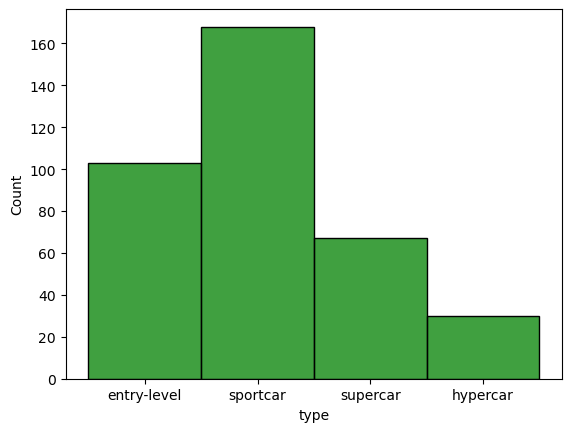

In [40]:
sns.histplot(df1['type'], color='green');

In [26]:
df1['transmission'].value_counts()

FR     141
MR      91
4WD     81
FF      39
RR      16
Name: transmission, dtype: int64

In [27]:
@interact(column=dict_float_cate.keys())
def plot_chart(column):
    plt.figure(figsize=(10, 4))

    sns.boxplot(data=df1, x='transmission', y=column, color='green').set(title = f'Boxplot of {dict_float_cate[column]} and Transmission', xlabel = 'Transmission', ylabel = dict_float_cate[column]);
    sns.stripplot(x="transmission", y=column, data=df1, size=2, color="black", linewidth=0)
    # fig.tight_layout()
    plt.grid()

interactive(children=(Dropdown(description='column', options=('pp', 'coll', 'price', 'hp', 'lbs', 'kg/hp'), va…

In [28]:
@interact(column=dict_float_cate.keys())
def plot_chart(column):
    plt.figure(figsize=(10, 4));

    # Show each observation with a scatterplot
    sns.stripplot(
        data=df1, x=column, y="type", hue="type",
        dodge=True, alpha=.25, zorder=1, legend=False
    );

    sns.pointplot(
        data=df1, x=column, y="type", hue="type",
        join=False, dodge=.8 - .8 / 3, palette="dark",
        markers="d", scale=.75, errorbar=None
    ).set(title = f'Conditional means  of {dict_float_cate[column]} and Type', xlabel = dict_float_cate[column], ylabel = 'Type');

interactive(children=(Dropdown(description='column', options=('pp', 'coll', 'price', 'hp', 'lbs', 'kg/hp'), va…

The performance of a supercar and a hypercar is relatively similar, however, their price differentiation is due to their luxury and rarity.

### Interact DataFrame

In [29]:
w_price = widgets.IntRangeSlider(
    value=[df1["price"].min(), df1["price"].max()],
    min=df1["price"].min(),
    max=df1["price"].max(),
    step=10000,
    description="Price:",
    orientation="horizontal",
    readout=True,
    readout_format=",",
    )
w_price.layout.width = '400px'

w_kg_hp = widgets.FloatRangeSlider(
    value=[df1["kg/hp"].min(), df1["kg/hp"].max()],
    min=df1["kg/hp"].min(),
    max=df1["kg/hp"].max(),
    step=0.1,
    description="Kg/Hp:",
    orientation="horizontal",
    readout=True,
    readout_format=",",
)
w_kg_hp.layout.width = '370px'

@interact
def filter(p_price=w_price, p_kg_hp=w_kg_hp):
    return df1[
    (df1["price"] >= p_price[0]) & (df1["price"] <= p_price[1]) & 
    (df1["kg/hp"] >= p_kg_hp[0]) & (df1["kg/hp"] <= p_kg_hp[1])
    ].sort_values('kg/hp',ascending=True)


interactive(children=(IntRangeSlider(value=(10000, 18500000), description='Price:', layout=Layout(width='400px…

### Interact Chart

In [30]:
@interact(column1=dict_float_cate.keys(), column2=dict_float_cate.keys())
def plot_chart(column1, column2):
    plt.figure(figsize=(10, 4))

    sns.scatterplot(data=df1, x=column1, y=column2, color='green').set(title = f'Correlation between {dict_float_cate[column1]} and {dict_float_cate[column2]}', xlabel = dict_float_cate[column1], ylabel = dict_float_cate[column2]);
    plt.grid()

interactive(children=(Dropdown(description='column1', options=('pp', 'coll', 'price', 'hp', 'lbs', 'kg/hp'), v…

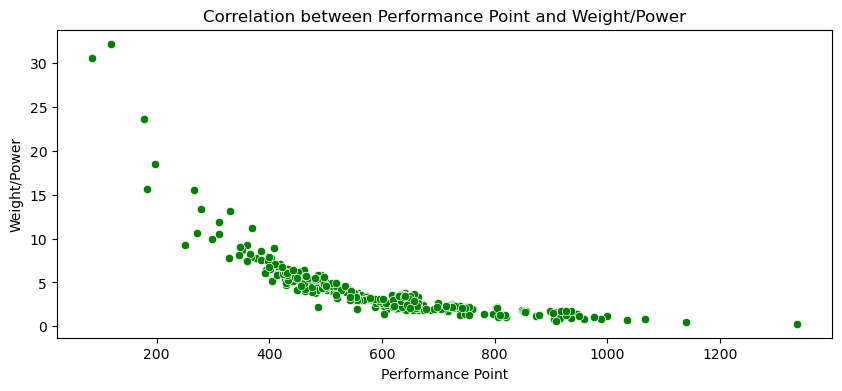

In [31]:
plt.figure(figsize=(10, 4));
sns.scatterplot(data=df1, x='pp', y='kg/hp', color='green').set(title = 'Correlation between Performance Point and Weight/Power', xlabel = 'Performance Point', ylabel = 'Weight/Power');

- The graph demonstrates the connection between Performance Point and both vehicle weight/power.
- To achieve higher Performance Point values, one must either decrease the weight of the car or increase the driving power, indicating a direct proportionality to driving power and an inverse proportionality to vehicle weight.

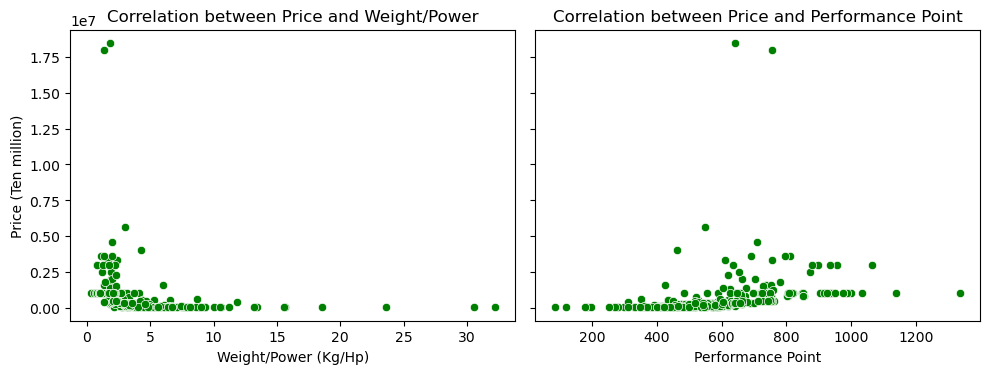

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True,)
ax=ax.flat

# plot in the first subplot
sns.scatterplot(data=df1, x='kg/hp', y='price', ax=next(ax), color='green').set(title = 'Correlation between Price and Weight/Power', xlabel = 'Weight/Power (Kg/Hp)', ylabel = 'Price (Ten million)');
# plot in the second subplot
sns.scatterplot(data=df1, x='pp', y='price', ax=next(ax), color='green').set(title = 'Correlation between Price and Performance Point', xlabel = 'Performance Point');
fig.tight_layout()
plt.show()

- The factor that affects the price is the ratio of weight to power, rather than Performance Point, as there may be constraints on Performance Point at certain stages, resulting in a lesser impact on price.
- The graph displays two points with higher prices than other vehicles (outliers), which suggests they are other factors affecting the price of the car besides the information presented, such as being a limited edition vehicle.

By analyzing various graphs, it's possible to determine the factors that impact a car's performance. To get the most value out of your car purchase, it's essential to consider these elements and seek out a vehicle that strikes the right balance of performance and efficiency.

แต่จากที่กล่าวมาทั้งหมด สิ่งที่สำคัญไม่ได้เพียงแค่ตัวรถแต่มันขึ้นอยู่กับคนหลังพวงมาลัยต่างหาก

![Alt Text](https://github.com/Pooote/Business_Intelligent/raw/main/Accident/dom.gif)

---

## If You Want To Remove Outlier

In [33]:
# Remove outlier that value less/more than z-scores=4
df2=df1.copy()
for col in dict_float_cate.keys():
    mean = df2[col].mean()
    std = df2[col].std()

    z_scores = (df2[col] - mean) / std

    threshold = 4
    df2 = df2[(z_scores > -threshold) & (z_scores < threshold)]
df2

,category,pp,transmission,coll,price,hp,lbs,kg/hp,img_url,type
model,,,,,,,,,,
Abarth 500 '09,[Road Car],377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Abarth 595 SS '70,[Road Car],184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Alfa Romeo 155 2.5 V6 TI '93,[Racing Car],673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...,supercar
Alfa Romeo 4C '14,"[Midship, Road Car]",523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Alfa Romeo 4C Gr.3,"[Midship, Racing Car]",724.0,MR,450.0,450000.0,528.0,2690.0,2.31,https://www.kudosprime.com/images/cars/gt7_car...,sportcar
...,...,...,...,...,...,...,...,...,...,...
Volkswagen Polo GTI '14,[Road Car],422.0,FF,28.0,28000.0,189.0,2804.0,6.73,https://www.kudosprime.com/images/cars/gt7_car...,entry-level
Volkswagen Scirocco Gr.4,[Racing Car],656.0,FF,350.0,350000.0,358.0,2315.0,2.93,https://www.kudosprime.com/images/cars/gt7_car...,sportcar
Volkswagen Scirocco R '10,[Road Car],498.0,FF,51.0,51500.0,252.0,3109.0,5.60,https://www.kudosprime.com/images/cars/gt7_car...,entry-level


In [34]:
dict_float_cate = {'pp': 'Performance Point','coll': 'Collector Level', 'price': 'Price (Ten Million)', 'hp': 'Horse Power', 'lbs': 'Weight (lbs)', 'kg/hp': 'Kg/Hp'}

In [35]:
@interact(column=dict_float_cate.keys())
def plot_chart(column):
    plt.figure(figsize=(10, 4))

    sns.boxplot(data=df2, x='transmission', y=column, color='green').set(title = f'Boxplot of {dict_float_cate[column]} and Transmission', xlabel = 'Transmission', ylabel = dict_float_cate[column]);
    sns.stripplot(x="transmission", y=column, data=df2, size=2, color="black", linewidth=0)
    # fig.tight_layout()
    plt.grid()

interactive(children=(Dropdown(description='column', options=('pp', 'coll', 'price', 'hp', 'lbs', 'kg/hp'), va…

In [36]:
@interact(column=dict_float_cate.keys())
def plot_chart(column):
    plt.figure(figsize=(10, 4));

    # Show each observation with a scatterplot
    sns.stripplot(
        data=df2, x=column, y="type", hue="type",
        dodge=True, alpha=.25, zorder=1, legend=False
    );

    sns.pointplot(
        data=df2, x=column, y="type", hue="type",
        join=False, dodge=.8 - .8 / 3, palette="dark",
        markers="d", scale=.75, errorbar=None
    ).set(title = f'Conditional means  of {dict_float_cate[column]} and Type', xlabel = dict_float_cate[column], ylabel = 'Type');

interactive(children=(Dropdown(description='column', options=('pp', 'coll', 'price', 'hp', 'lbs', 'kg/hp'), va…

### Interact DataFrame

In [37]:
w_price = widgets.IntRangeSlider(
    value=[df2["price"].min(), df2["price"].max()],
    min=df2["price"].min(),
    max=df2["price"].max(),
    step=10000,
    description="Price:",
    orientation="horizontal",
    readout=True,
    readout_format=",",
    )
w_price.layout.width = '400px'

w_kg_hp = widgets.FloatRangeSlider(
    value=[df2["kg/hp"].min(), df2["kg/hp"].max()],
    min=df2["kg/hp"].min(),
    max=df2["kg/hp"].max(),
    step=0.1,
    description="Kg/Hp:",
    orientation="horizontal",
    readout=True,
    readout_format=",",
)
w_kg_hp.layout.width = '370px'

@interact
def filter(p_price=w_price, p_kg_hp=w_kg_hp):
    return df2[
    (df2["price"] >= p_price[0]) & (df2["price"] <= p_price[1]) & 
    (df2["kg/hp"] >= p_kg_hp[0]) & (df2["kg/hp"] <= p_kg_hp[1])
    ].sort_values('kg/hp',ascending=True)


interactive(children=(IntRangeSlider(value=(10000, 3300000), description='Price:', layout=Layout(width='400px'…

### Interact Chart

In [38]:
@interact(column1=dict_float_cate.keys(), column2=dict_float_cate.keys())
def plot_chart(column1, column2):
    plt.figure(figsize=(10, 4))

    sns.scatterplot(data=df2, x=column1, y=column2, color='green').set(title = f'Correlation between {dict_float_cate[column1]} and {dict_float_cate[column2]}', xlabel = dict_float_cate[column1], ylabel = dict_float_cate[column2]);
    plt.grid()

interactive(children=(Dropdown(description='column1', options=('pp', 'coll', 'price', 'hp', 'lbs', 'kg/hp'), v…

---

## Conclusion

In this analysis, we evaluated the car list in Gran Turismo 7 and analyzed the various car brands and models available in the game. Our findings showed that the game has a diverse and extensive car list, featuring a wide range of car brands and models from around the world.

Additionally, we found that the game includes both classic and modern cars, catering to different player preferences and driving styles. The game also offers a large selection of performance and racing cars, allowing players to experience the thrill of high-speed driving.

However, we also observed that some players have expressed disappointment with the game's car list, as certain popular brands and models are missing from the game. This highlights the need for game developers to strike a balance between offering a large and diverse car list while also ensuring that the most popular and iconic cars are included.

In conclusion, the car list in Gran Turismo 7 is a strength of the game, offering a wide range of options for players to choose from. While there are some missing brands and models, the overall quality and diversity of the car list makes it a popular and enjoyable aspect of the game.